In [16]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
%autoreload 2

In [18]:
import importlib
import processes
importlib.reload(processes)
from processes import *
import cv2
from matplotlib import pyplot as plt
import numpy as np
import argparse
import math

Creating Images

Width: 509 pixels
Height: 537 pixels


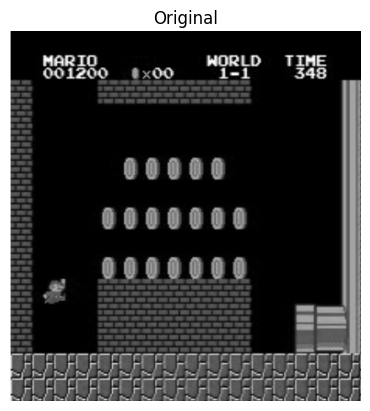

Width: 27 pixels
Height: 44 pixels


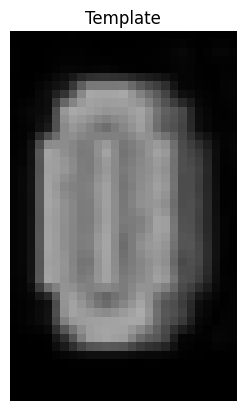

In [19]:
originalImage = cv2.imread("../images/marioGame.png", cv2.IMREAD_GRAYSCALE)
templateImage = cv2.imread("../images/coin.png", cv2.IMREAD_GRAYSCALE)

image = originalImage.copy()
template = templateImage.copy()
height, width = image.shape[:2]  # shape returns (height, width, channels)

# Print the dimensions
print(f"Width: {width} pixels")
print(f"Height: {height} pixels")

display_image(image, "Original")

height, width = template.shape[:2]  # shape returns (height, width, channels)

# Print the dimensions
print(f"Width: {width} pixels")
print(f"Height: {height} pixels")
display_image(template, "Template")

w, h = template.shape[::-1]

TM_CCOEFF Method

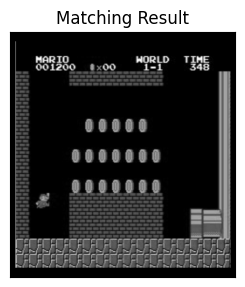


Matching Result Dimensions
Width: 509 pixels
Height: 538 pixels

Detected Point dimensions
Width: 509 pixels
Height: 537 pixels


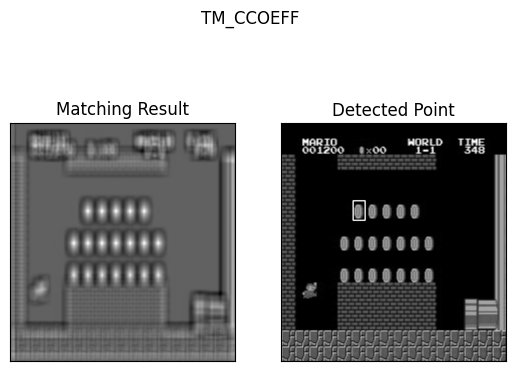

In [20]:
img = create_border(image.copy(), template)
#img = image.copy()
method = getattr(cv2, "TM_CCOEFF")

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.show()
# Apply template Matching
res = cv2.matchTemplate(img,template,method)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

# If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
top_left = max_loc
top_left = (top_left[0] - w // 2, top_left[0])
bottom_right = (top_left[0] + w, top_left[1] + h)

cv2.rectangle(image,top_left, bottom_right, 255, 2)

#img = remove_border(img, image.copy(), template)

print("\nMatching Result Dimensions")
height, width = res.shape[:2]  # shape returns (height, width, channels)

# Print the dimensions
print(f"Width: {width} pixels")
print(f"Height: {height} pixels")
plt.subplot(121),plt.imshow(res,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(image,cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.suptitle("TM_CCOEFF")

print("\nDetected Point dimensions")
height, width = image.shape[:2]  # shape returns (height, width, channels)

# Print the dimensions
print(f"Width: {width} pixels")
print(f"Height: {height} pixels")

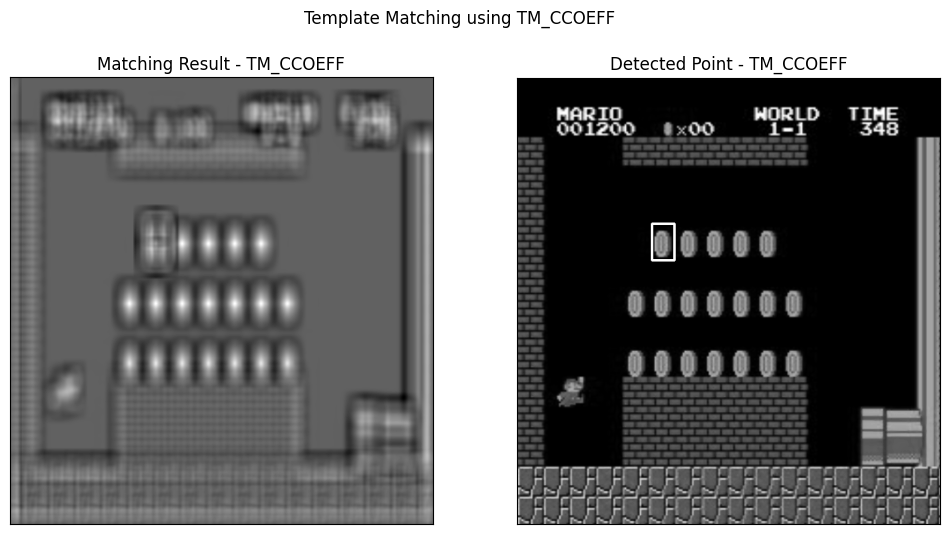


Matching Result TM_CCOEFF Dimensions
Width: 509 pixels
Height: 538 pixels

Detected Point dimensions
Width: 509 pixels
Height: 537 pixels


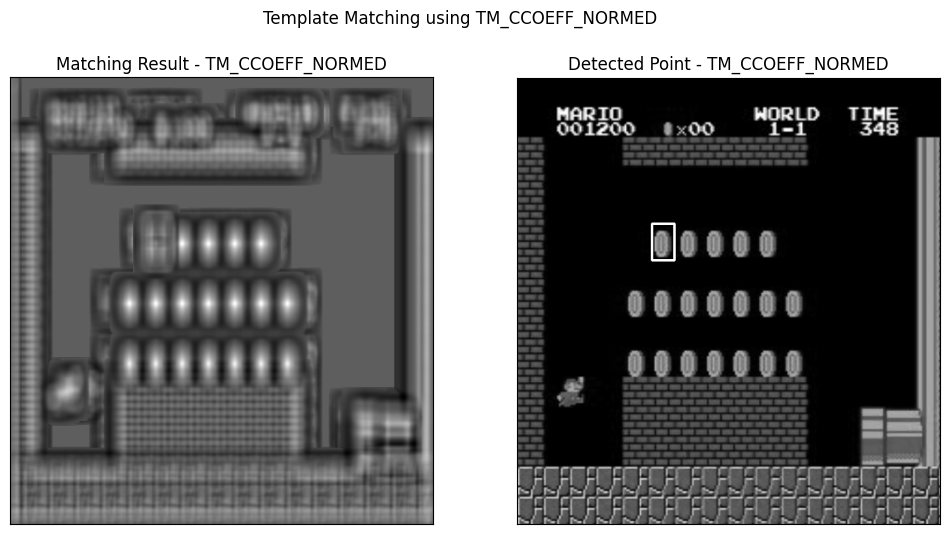


Matching Result TM_CCOEFF_NORMED Dimensions
Width: 509 pixels
Height: 538 pixels

Detected Point dimensions
Width: 509 pixels
Height: 537 pixels


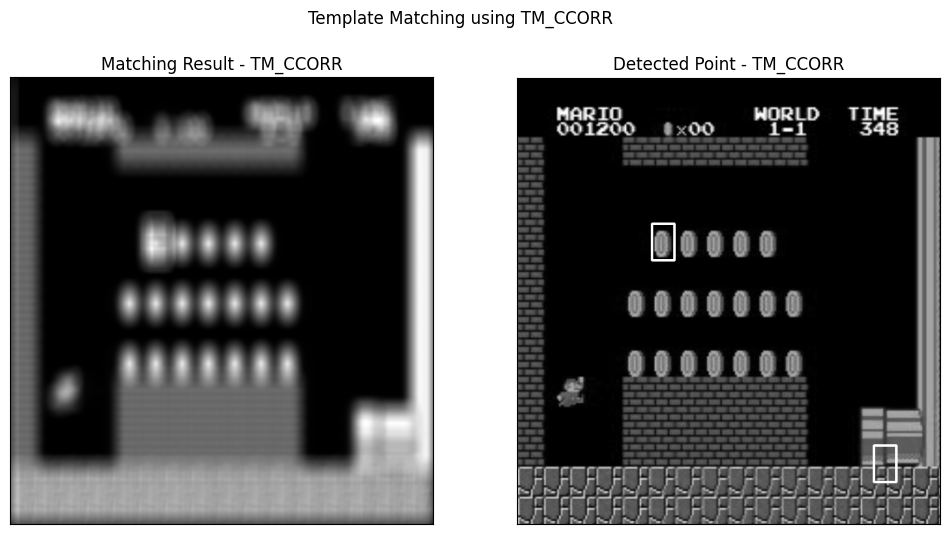


Matching Result TM_CCORR Dimensions
Width: 509 pixels
Height: 538 pixels

Detected Point dimensions
Width: 509 pixels
Height: 537 pixels


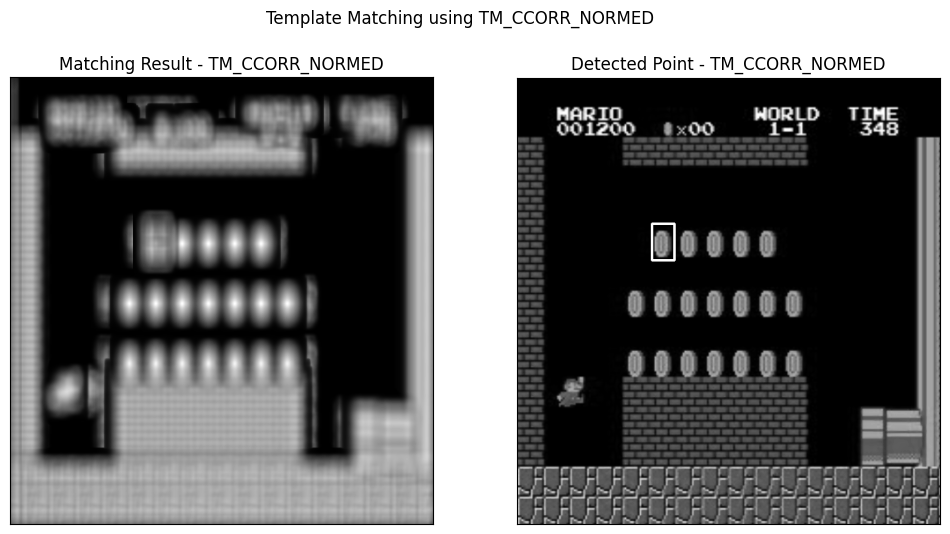


Matching Result TM_CCORR_NORMED Dimensions
Width: 509 pixels
Height: 538 pixels

Detected Point dimensions
Width: 509 pixels
Height: 537 pixels


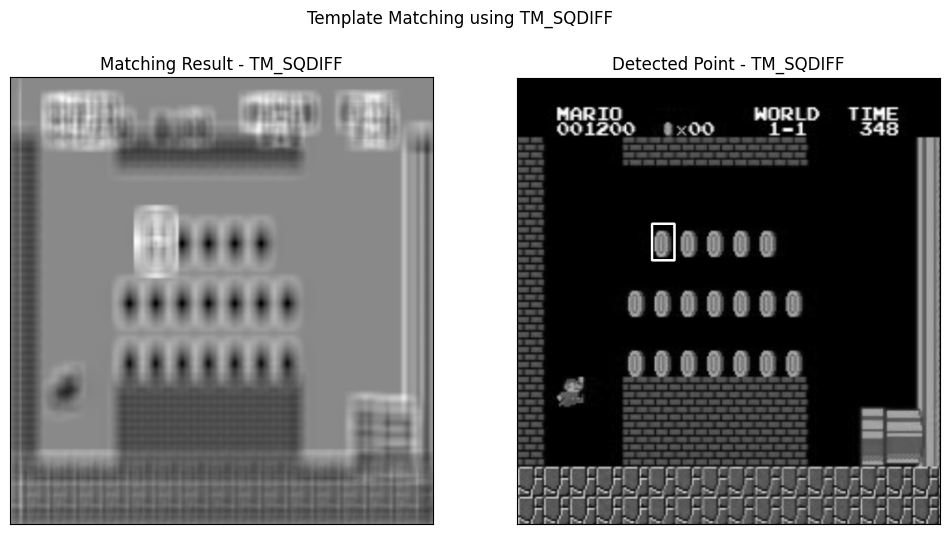


Matching Result TM_SQDIFF Dimensions
Width: 509 pixels
Height: 538 pixels

Detected Point dimensions
Width: 509 pixels
Height: 537 pixels


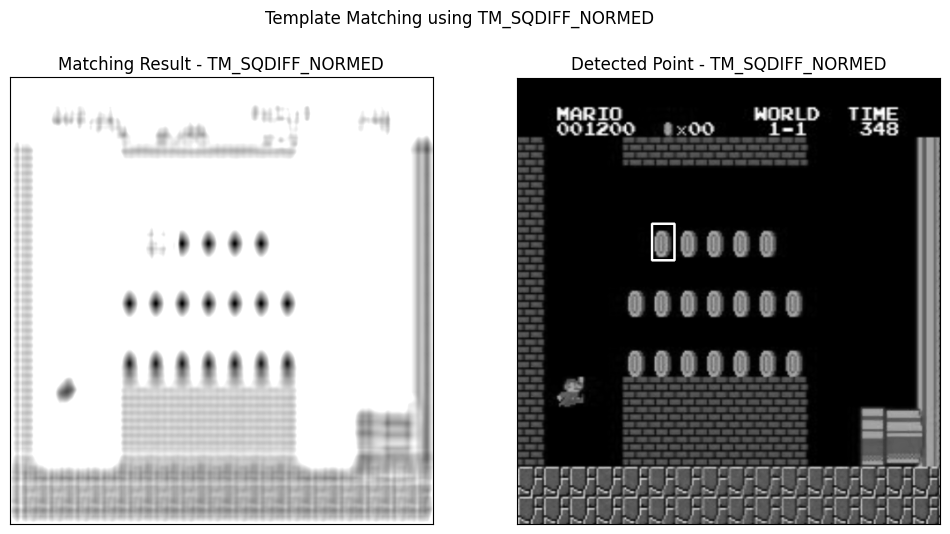


Matching Result TM_SQDIFF_NORMED Dimensions
Width: 509 pixels
Height: 538 pixels

Detected Point dimensions
Width: 509 pixels
Height: 537 pixels


In [21]:
methods = ['TM_CCOEFF', 'TM_CCOEFF_NORMED', 'TM_CCORR', 'TM_CCORR_NORMED', 'TM_SQDIFF', 'TM_SQDIFF_NORMED']

for meth in methods:
    tempTemp = template.copy()
    tempImage = image.copy()
    img = create_border(tempImage, tempTemp)
    method = getattr(cv2, meth)

    # Apply template Matching
    res = cv2.matchTemplate(img, tempTemp, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take the minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    # Adjust the top-left corner based on template dimensions
    h, w = tempTemp.shape[:2]
    top_left = (top_left[0] - w // 2, top_left[0])
    bottom_right = (top_left[0] + w, top_left[1] + h)

    # Draw a rectangle around the detected region on the original image
    detected_image = tempImage  # Copy the bordered image to draw the rectangle
    cv2.rectangle(detected_image, top_left, bottom_right, 255, 2)

    # Plot the matching result (res) and the detected point image (image with the rectangle)
    plt.figure(figsize=(12, 6))

    # Plot the Matching Result (res)
    plt.subplot(121)
    plt.imshow(res, cmap='gray')  # Show the result matrix, not the original image
    plt.title(f'Matching Result - {meth}')
    plt.xticks([]), plt.yticks([])

    # Plot the Detected Point (image with the rectangle)
    plt.subplot(122)
    plt.imshow(detected_image, cmap='gray')  # Show the image with the rectangle
    plt.title(f'Detected Point - {meth}')
    plt.xticks([]), plt.yticks([])

    plt.suptitle(f"Template Matching using {meth}")
    plt.show()

    print(f"\nMatching Result {meth} Dimensions")
    height, width = res.shape  # No need to reverse since res is 2D (height, width)
    print(f"Width: {width} pixels")
    print(f"Height: {height} pixels")

    print("\nDetected Point dimensions")
    height, width = tempImage.shape[:2]  # Image shape has to be indexed for (height, width)
    print(f"Width: {width} pixels")
    print(f"Height: {height} pixels")